Let's have a look at how to implement a neural network in Python. 

### Implementing the Feedforward Part of a Neural Network

As a small programming exercise and to improve our understanding of neural networks, let's implement the feedforward part of a neural network from scratch. We will have to calculate the output of the network for some given weights and biases, as well as some inputs. Let's start by importing the necessary libraries

In [1]:
import numpy as np

Next, we define the activation function for which we use the sigmoid function

In [2]:
def activation_function(x):
    return 1/(1+np.exp(-x)) # sigmoid function

Now, we define the feedforward function which calculates the output of the neural network given some inputs, weights, and biases. The function takes the inputs, weights, and biases as arguments and returns the output of the network

In [3]:
def feedforward(inputs, w1, w2, b1, b2):

    # Compute the pre-activation values for the first layer
    z = b1 + np.matmul(w1, inputs)

    # Compute the post-activation values for the first layer
    a = activation_function(z)

    # Combine the post-activation values of the first layer to an output
    g = b2 + np.matmul(w2, a)

    return g

Mathematically, the function computes the following

$$z = b^{1} + w^1 x$$

$$a = \phi(z)$$

$$g = b^2 + w^2 a$$

and returns $g$ at the end. We have written this using matrix notation to make it more compact.  Remember that node $j$ in the hidden layer is given by

$$ z_j = b_{j}^{1} + \sum_{i=1}^N w_{ji}^{1} x_i$$

$$ a_j = \phi(z_j)$$

and the output of the network is given by

$$ g(x ; w) = b^{2}+\sum_{j=1}^{M} w_{j}^{2} a_j.$$


Let's test the function with some example inputs, weights and biases

In [4]:
# Define the weights and biases
w1 = np.array([[0.1, 0.2], [0.3, 0.4]]) # 2x2 matrix
w2 = np.array([0.5, 0.6]) # 1-d vector
b1 = np.array([0.1, 0.2]) # 1-d vector
b2 = 0.3

# Define the inputs
inputs = np.array([1, 2]) # 1-d vector

# Compute the output of the network
feedforward(inputs, w1, w2, b1, b2)

1.0943291429384328

To operationalize this, we would also need to define a loss function and an optimization algorithm to update the weights and biases. However, this is beyond the scope of this course.

::: {.callout-note}
### Mini-Exercise

Define a new function `deep_feedforward` that takes `w3` and `b3` as additional arguments and computes the output of a neural network with two hidden layers. The function should return the output of the network.

Note that you will have to change the dimensions of the weights and biases, `w2` and `b2`, to match the new hidden layer.

:::


### Using Neural Networks in Sci-Kit Learn

Sci-kit learn provides a simple interface to use neural networks. However, it is not as flexible as the more commonly used PyTorch or TensorFlow. We can reuse the **dataset of credit card transactions** from [Kaggle.com](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data) to demonstrate how to use neural networks in scikit-learn.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score, roc_curve
pd.set_option('display.max_columns', 50) # Display up to 50 columns

# Load the data
df = pd.read_csv('data/card_transdata.csv')

# Split the data into training and test sets
X = df.drop('fraud', axis=1) # All variables except `fraud`
y = df['fraud'] # Only our fraud variables
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

# Scale the features
def scale_features(scaler, df, col_names, only_transform=False):

    # Extract the features we want to scale
    features = df[col_names] 

    # Fit the scaler to the features and transform them
    if only_transform:
        features = scaler.transform(features.values)
    else:
        features = scaler.fit_transform(features.values)

    # Replace the original features with the scaled features
    df[col_names] = features

col_names = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'] 
scaler = StandardScaler() 
scale_features(scaler, X_train, col_names)
scale_features(scaler, X_test, col_names, only_transform=True)

Recall that the target variable $y$ is `fraud`, which indicates whether the transaction is fraudulent or not. The other variables are the features $x$ of the transactions.

To use a neural network for a classification task, we can use the `MLPClassifier` class from scikit-learn. The following code snippet shows how to use a neural network with one hidden layer with 16 nodes

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(16,), random_state=42, verbose=False).fit(X_train, y_train)

If you would like to use a neural network with multiple hidden layers, you can specify the number of nodes per hidden layer using the `hidden_layer_sizes` parameter. For example, the following code snippet shows how to use a neural network with two hidden layers, one with 5 nodes and the other with 4 nodes

In [7]:
#| eval: false
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,4), activation='logistic', random_state=42).fit(X_train, y_train)

Note that the `alpha` parameter specifies the regularization strength, the `activation` parameter specifies the activation function (by default it uses `relu`) and the `random_state` parameter specifies the seed for the random number generator (useful for reproducible results).

We can check the loss curve to see how the neural network loss declined during training

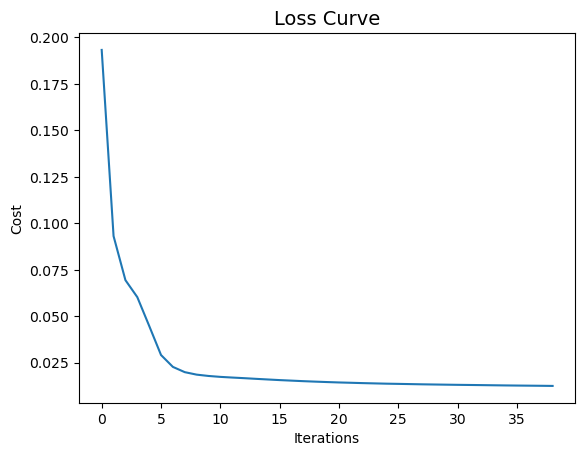

In [8]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

We can then use the same way to evaluate the neural network performance as we did for the other ML models

In [9]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba[:, 1])}")

Accuracy: 0.9955266666666667
Precision: 0.971747127308582
Recall: 0.9772319896266352
ROC AUC: 0.9996638991577014


The neural network performs substantially better than the logistic regression. As in the case of the tree-based methods, the ROC AUC score is much closer to the maximum value of 1 and we have an almost perfect classifier

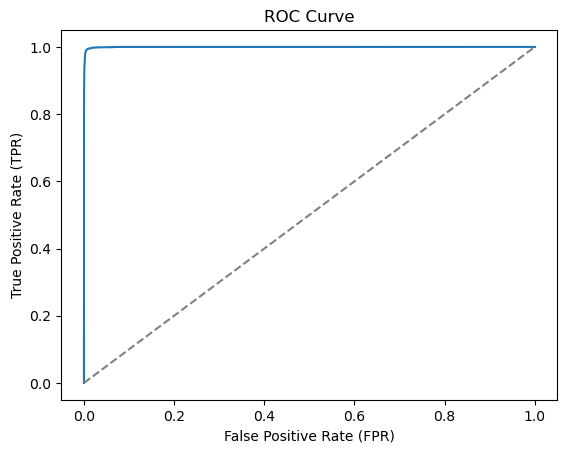

In [10]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()

Let's also check the confusion matrix to see where we still make mistakes

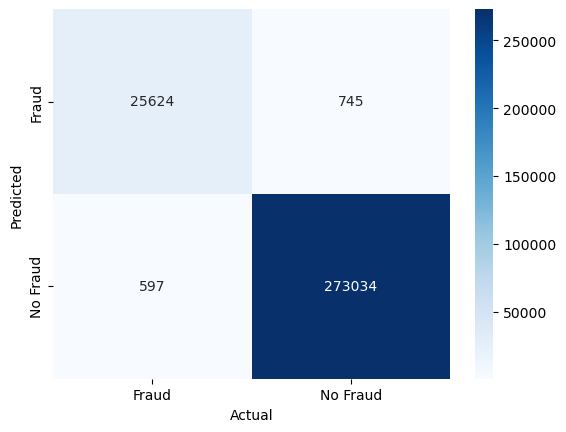

In [11]:
conf_mat = confusion_matrix(y_test, y_pred, labels=[1, 0]).transpose() # Transpose the sklearn confusion matrix to match the convention in the lecture
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=['Fraud', 'No Fraud'], yticklabels=['Fraud', 'No Fraud'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

There are around 270 false negatives, i.e., a fraudulent transaction that we did not detect. There are also around 980 false positives, i.e., "false alarms", where non-fraudulent transactions were classified as fraudulent.


### Using Neural Networks in PyTorch

While it is possible to use neural networks in scikit-learn, it is more common to use PyTorch or TensorFlow for neural networks. PyTorch is a popular deep-learning library that is widely used in academia and industry. In this section, we will show how to use PyTorch to build a simple neural network for the same credit card fraud detection task.

::: {.callout-warning}
### Feel Free to Skip This Section

This section might be a bit more challenging than what we have looked at previously. If you think that you are not ready for this, feel free to skip this section. This is mainly meant to be a starting point for those who are interested in learning more about neural networks.

For a more in-depth introduction to PyTorch, I recommend that you check out the [official PyTorch tutorials](https://pytorch.org/tutorials/). This section, in particular, builds on the [Learning PyTorch with Examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) tutorial.

:::


Let's start by importing the necessary libraries

In [12]:
import torch
from torch.utils.data import DataLoader, TensorDataset

Then, let's prepare the data for PyTorch. We need to convert the data in our DataFrame to PyTorch tensors

In [13]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

Note that we also converted the input values to `float32` for improved training speed and the target values to `long` which is a type of integer (remember our target `y` can only take values zero or one). Next, we need to create a `DataLoader` object to load the data in mini-batches during the training process

In [14]:
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=200, shuffle=True)
dataset_size = len(dataloader.dataset)

Next, we define the neural network model using the `nn` module from PyTorch

In [15]:
model = torch.nn.Sequential(
    torch.nn.Linear(7, 16), # 7 input features, 16 nodes in the hidden layer
    torch.nn.ReLU(),        # ReLU activation function
    torch.nn.Linear(16, 2) # 16 nodes in the hidden layer, 2 output nodes (fraud or no fraud)
)

We also need to define the loss function and the optimizer. We will use the cross-entropy loss function and the Adam optimizer

In [16]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5) # Adam optimizer with learning rate of 0.001 and L2 regularization (analogous to alpha in scikit-learn)

We can now train the neural network using the following code snippet

In [17]:
for epoch in range(80):

    # Loop over batches in an epoch using DataLoader
    for id_batch, (X_batch, y_batch) in enumerate(dataloader):

        # Compute the predicted y using the neural network model with the current weights
        y_batch_pred = model(X_batch)

        # Compute the loss
        loss = loss_fn(y_batch_pred, y_batch)

        # Reset the gradients of the loss function to zero
        optimizer.zero_grad()

        # Compute the gradient of the loss with respect to model parameters
        loss.backward()

        # Update the weights by taking a "step" in the direction that reduces the loss
        optimizer.step()

    if epoch % 10 == 9:
        print(f"Epoch {epoch} loss: {loss.item():>7f}")

Epoch 9 loss: 0.026985
Epoch 19 loss: 0.036898
Epoch 29 loss: 0.013686
Epoch 39 loss: 0.008159
Epoch 49 loss: 0.067167
Epoch 59 loss: 0.020151
Epoch 69 loss: 0.035507
Epoch 79 loss: 0.017207


Note that here we are updating the model weights for each mini-batch in the dataset and go over the whole dataset 80 times (epochs). We print the loss every epoch to see how the loss decreases over time.

The following snippet shows how to use full-batch gradient descent instead of mini-batch gradient descent

In [18]:
#| eval: false
for epoch in range(2000):

    # Compute the predicted y using the neural network model with the current weights
    y_epoch_pred = model(X_train_tensor)

    # Compute the loss
    loss = loss_fn(y_epoch_pred, y_train_tensor)

    # Reset the gradients of the loss function to zero
    optimizer.zero_grad()

    # Compute the gradient of the loss with respect to model parameters
    loss.backward()

    # Update the weights by taking a "step" in the direction that reduces the loss
    optimizer.step()

    # Print the loss every 100 epochs
    if epoch % 100 == 99:
        print(f"Epoch {epoch} loss: {loss.item():>7f}")

Epoch 99 loss: 0.019051
Epoch 199 loss: 0.019033
Epoch 299 loss: 0.019024
Epoch 399 loss: 0.019020
Epoch 499 loss: 0.019016
Epoch 599 loss: 0.019014
Epoch 699 loss: 0.019012
Epoch 799 loss: 0.019009
Epoch 899 loss: 0.019007
Epoch 999 loss: 0.019005
Epoch 1099 loss: 0.019004
Epoch 1199 loss: 0.019002
Epoch 1299 loss: 0.019000
Epoch 1399 loss: 0.018997
Epoch 1499 loss: 0.018995
Epoch 1599 loss: 0.018993
Epoch 1699 loss: 0.018991
Epoch 1799 loss: 0.018988
Epoch 1899 loss: 0.018986
Epoch 1999 loss: 0.018983


Note that in this version we are updating the model weights 2000 times (epochs) and printing the loss every 100 epochs. We can now evaluate the model on the test set

In [19]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = torch.argmax(model(X_test_tensor), dim=1).numpy()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

Accuracy: 0.9923833333333333
Precision: 0.9520661781370401
Recall: 0.9612524312573891


Note that for simplicity we are reusing the sci-kit learn metrics to evaluate the model. 

However, our neural network trained in PyTorch does not perform exactly the same as the neural network trained in scikit-learn. This is likely because of different hyperparameters or different initializations of the weights. In practice, it is common to experiment with different hyperparameters to find the best model or to use grid search and cross-validation to try many values and find the best-performing ones.


### Conclusions

In this chapter, we have learned about neural networks, which are the foundation of deep learning. We have seen how to implement parts of a simple neural network from scratch and how to use neural networks in scikit-learn and PyTorch.